Iranian Movie Reccomender

Import libraries


In [70]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
df = pd.read_csv('Iranian Movie.csv')
df

,Link,EN_title,PENGLISH_title,PERSIAN_title,Content_1,Content_2,Score,Year,Genre,Time
0,https://www.imvbox.com/watch-persian-movie-ira...,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018,Drama,73
1,https://www.imvbox.com/watch-persian-movie-ira...,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018,Crime,78
2,https://www.imvbox.com/watch-persian-movie-ira...,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017,Drama,77
3,https://www.imvbox.com/watch-persian-movie-ira...,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018,Drama,79
4,https://www.imvbox.com/watch-persian-movie-ira...,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017,Drama,85
...,...,...,...,...,...,...,...,...,...,...
1432,https://www.imvbox.com/watch-persian-movie-ira...,The Cow,Gav,گاو,"گاو ""مشهدی حسن "" می میرد و او که گاوش را خیلی ...",Often credited as being the first Iranian New ...,8.1,1969,Drama,100
1433,https://www.imvbox.com/watch-persian-movie-ira...,Cold Iron,Sardie Ahan,سردی آهن,NaN,'Sardie Ahan' is an artistically filmed portra...,8.0,1968,Experimental,19
1434,https://www.imvbox.com/watch-persian-movie-ira...,Secret of Behjat's House,Raze Khaneye Behjat,راز خانه بهجت,NaN,"After many years away, Ali Naghi comes home to...",4.7,2014,Drama,87
1435,https://www.imvbox.com/watch-persian-movie-ira...,The Sicilian,Sisiliha,سیسیلی‌ها,سهراب به سیاوش که کلاهبردار است و عاشق ایتالیا...,Though he comes from a poor area south of Tehr...,5.4,2011,Crime,89


In [72]:
df.drop(['Link','PENGLISH_title','Year','Time','Content_1'], axis=1,inplace=True)
df

,EN_title,PERSIAN_title,Content_2,Score,Genre
0,Local Anaesthetic,بی‌حسی موضعی,"Jalal, a dropouts philosophy student, realizes...",4.8,Drama
1,Disturbance,آشفته گی,"After the murder of his rich twin brother, Bar...",3.8,Crime
2,Highlight,هایلایت,A man and a woman are have a car accident and ...,4.4,Drama
3,Gilda,گیلدا,Gilda who owns a restaurant has a terrible nig...,3.8,Drama
4,Atmosphere Station,ایستگاه اتمسفر,Vahid and Marjan are a young couple who have g...,5.6,Drama
...,...,...,...,...,...
1432,The Cow,گاو,Often credited as being the first Iranian New ...,8.1,Drama
1433,Cold Iron,سردی آهن,'Sardie Ahan' is an artistically filmed portra...,8.0,Experimental
1434,Secret of Behjat's House,راز خانه بهجت,"After many years away, Ali Naghi comes home to...",4.7,Drama
1435,The Sicilian,سیسیلی‌ها,Though he comes from a poor area south of Tehr...,5.4,Crime


Analysing df

In [73]:
df.info()
df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EN_title       1437 non-null   object 
 1   PERSIAN_title  1436 non-null   object 
 2   Content_2      1231 non-null   object 
 3   Score          1437 non-null   float64
 4   Genre          1437 non-null   object 
dtypes: float64(1), object(4)
memory usage: 56.3+ KB


,EN_title,PERSIAN_title,Content_2,Score,Genre
0,Local Anaesthetic,بی‌حسی موضعی,"Jalal, a dropouts philosophy student, realizes...",4.8,Drama
1,Disturbance,آشفته گی,"After the murder of his rich twin brother, Bar...",3.8,Crime
2,Highlight,هایلایت,A man and a woman are have a car accident and ...,4.4,Drama
3,Gilda,گیلدا,Gilda who owns a restaurant has a terrible nig...,3.8,Drama
4,Atmosphere Station,ایستگاه اتمسفر,Vahid and Marjan are a young couple who have g...,5.6,Drama
...,...,...,...,...,...
1432,The Cow,گاو,Often credited as being the first Iranian New ...,8.1,Drama
1433,Cold Iron,سردی آهن,'Sardie Ahan' is an artistically filmed portra...,8.0,Experimental
1434,Secret of Behjat's House,راز خانه بهجت,"After many years away, Ali Naghi comes home to...",4.7,Drama
1435,The Sicilian,سیسیلی‌ها,Though he comes from a poor area south of Tehr...,5.4,Crime


Now we Analysing our first part> based on score and popularity

In [74]:
#Sort movies based on score calculated above
movies = df.sort_values('Score', ascending=False)

#Print the top 15 movies
movies[['EN_title', 'PERSIAN_title', 'Score']].head(10)

,EN_title,PERSIAN_title,Score
851,A True Report,یگ گزارش واقعی,10.0
796,Untimely Rooster,خروس بی‌محل,10.0
950,A Good Time For Tragedy,وقت خوب مصائب,9.6
596,No One Cares About Jungles!,!کسی به فکر جنگل ها نیست,9.6
542,Whose Life Is It Anyway?,بالاخره این زندگی مال کیه؟,9.6
1021,Summit of the Wave,اوج موج,9.5
1061,The Fifth Reaction,واكنش پنجم,9.5
1070,The Mirror of the Soul,جام جان,9.4
410,Bedridden,استراحت مطلق,9.4
1431,Mr. Gullible,آقای هالو,9.3


Text(0.5, 1.0, 'Popular Movies')

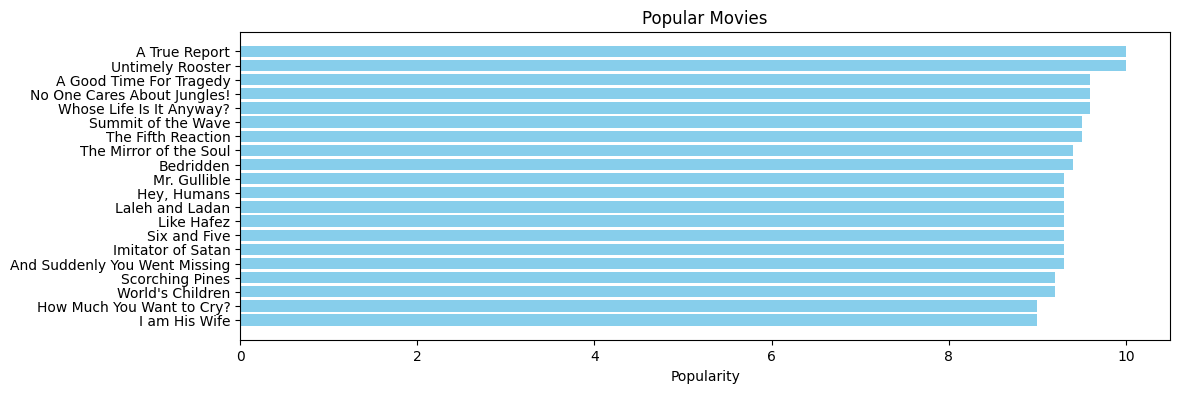

In [75]:
popularity= df.sort_values('Score', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(popularity['EN_title'].head(20),popularity['Score'].head(20), align='center',
        color='skyblue')

plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Its time to make the Reccomender>

Content Based Filtering
In this recommender system the content of the movie is used to find its similarity with other movies. 

Then the movies that are most likely to be similar are recommended.

In [76]:
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['Content_2'] = df['Content_2'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['Content_2'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(1437, 10815)

We see that over 10,000 different words were used to describe the 1437 movies in our dataset.

We will be using the cosine similarity to calculate similarity btw to Movies

In [77]:

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [78]:
indices = pd.Series(df.index, index=df['PERSIAN_title']).drop_duplicates()
indices

PERSIAN_title
بی‌حسی موضعی         0
آشفته گی             1
هایلایت              2
گیلدا                3
ایستگاه اتمسفر       4
                  ... 
گاو               1432
سردی آهن          1433
راز خانه بهجت     1434
سیسیلی‌ها         1435
شارلاتان          1436
Length: 1437, dtype: int64

In [79]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['PERSIAN_title'].iloc[movie_indices]

In [80]:
get_recommendations('هایلایت')

829     برخورد خیلی نزدیک
876                 مهمان
1291              مسافران
1124               رنگ شب
859                  سرقت
949                 تقاطع
1100                  آبی
331                 انزوا
1201                مرسدس
671             گواهینامه
Name: PERSIAN_title, dtype: object

The Above result is the reccomendation based on similarity of the storyline of the Movie.


Now we build the Reccomendation based on genre

In [81]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''
        

df['Genre'].apply(clean_data)       

0              drama
1              crime
2              drama
3              drama
4              drama
            ...     
1432           drama
1433    experimental
1434           drama
1435           crime
1436          comedy
Name: Genre, Length: 1437, dtype: object

In [82]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['Genre'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)




In [85]:
df = df.reset_index(drop=True)
indices = pd.Series(df.index, index=df['PERSIAN_title'])


In [84]:
get_recommendations('هایلایت', cosine_sim2)

2            هایلایت
3              گیلدا
4     ایستگاه اتمسفر
7             پسرکشی
8            در سکوت
9           نرگس مست
10               بهت
12           پل سفید
13        حکایت دریا
14           بی وزنی
Name: PERSIAN_title, dtype: object